In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(color_codes= True)
%matplotlib inline

df= pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##**Also! You might encounter some hidden cells! Just click on them and they'll reveal themselves! Thanks!**

In [ ]:
df

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summe

In [ ]:
m,n= df.shape
print("Number of Samples is %d"%m)
print("Number of Variables is %d"%n)

Number of Samples is 1573
Number of Variables is 43


In [ ]:
len(df.columns[0])

5

In [ ]:
df.dtypes

title                            object
title_orig                       object
price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64


In [ ]:
#Wrangling the dataset to deal with NULL values properly
df['has_urgency_banner']= pd.to_numeric(df.replace({'has_urgency_banner':{np.nan:0}})['has_urgency_banner'])

#Replacing NULL Values of Rating Count with Zero
df["rating_five_count"]= pd.to_numeric(df.replace({"rating_five_count":{np.nan:0}})["rating_five_count"])
df["rating_four_count"]= pd.to_numeric(df.replace({"rating_four_count":{np.nan:0}})["rating_four_count"])
df["rating_three_count"]= pd.to_numeric(df.replace({"rating_three_count":{np.nan:0}})["rating_three_count"])
df["rating_two_count"]= pd.to_numeric(df.replace({"rating_two_count":{np.nan:0}})["rating_two_count"])
df["rating_one_count"]= pd.to_numeric(df.replace({"rating_one_count":{np.nan:0}})["rating_one_count"])
df["rating_count"]= df["rating_count"].astype(float) #Convert to float
 

In [ ]:
#Wrangling the product_variation_size column to display Uniform Size Labels
df.iloc[765]["product_variation_size_id"]= "XL"
df.iloc[877]["product_variation_size_id"]= "S"
df.iloc[708:711]["product_variation_size_id"]= "S"

df["product_variation_size_id"]= df["product_variation_size_id"].str.replace("Size", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.replace("SIZE", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.replace("size", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.replace("Suit", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.replace("-", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.replace(".", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.replace(".", "")
df["product_variation_size_id"]= df["product_variation_size_id"].str.strip()

df["product_variation_size_id"]= df.replace({"product_variation_size_id":{"One":1,"2XL":"XXL","XXXL":"3XL","XXXXL":"4XL","XXXXXL":"5XL"}})["product_variation_size_id"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [ ]:
#Finding No. of Unique Values and No. of NULL Entries in each variable

for col in df.columns :
    #Getting the list of all the unique values in a column
    list_unique= pd.unique(df[col].dropna())

    #Printing the number of unique variables and no. of NULL variables and also
    #printing the unique variables if less than 10 in number
    if len(list_unique)<16:
        print("The Variable "+col+" has "+str(len(list_unique))+" unique values and "+ str( np.sum(pd.isna(df[col]))) +" NULL entries.")
        list_str=""
        
        #Initialising a string for proper display, extracting each unique value from the list
        for val in range(len(list_unique)):
            list_str= list_str + str(list_unique[val]) +", "
        
        print("The Unique Values are:"+ list_str[0:len(list_str)-2]+"\n")

    else:
      print("The Variable "+col+" has "+str(len(list_unique))+" unique values and "+ str( np.sum(pd.isna(df[col]))) +" NULL entries.\n")

The Variable title has 1201 unique values and 0 NULL entries.

The Variable title_orig has 1203 unique values and 0 NULL entries.

The Variable price has 127 unique values and 0 NULL entries.

The Variable retail_price has 104 unique values and 0 NULL entries.

The Variable currency_buyer has 1 unique values and 0 NULL entries.
The Unique Values are:EUR

The Variable units_sold has 15 unique values and 0 NULL entries.
The Unique Values are:100, 20000, 5000, 10, 50000, 1000, 10000, 100000, 50, 1, 7, 2, 3, 8, 6

The Variable uses_ad_boosts has 2 unique values and 0 NULL entries.
The Unique Values are:0, 1

The Variable rating has 192 unique values and 0 NULL entries.

The Variable rating_count has 761 unique values and 0 NULL entries.

The Variable rating_five_count has 605 unique values and 0 NULL entries.

The Variable rating_four_count has 440 unique values and 0 NULL entries.

The Variable rating_three_count has 384 unique values and 0 NULL entries.

The Variable rating_two_count has

#**Q2 )a) vii) Identifying Ordinal, Nominal, Temporal, Integer and Continuous Variables**

title - Nominal                 
title_orig - Nominal                      
price - Continuous                          
retail_price- Continuous                    
currency_buyer  - Nominal                 
units_sold  - Integer                     
uses_ad_boosts - Nominal          
rating - Continuous       
rating_count - Continuous                  
rating_five_count     - Continuous          
rating_four_count     - Continuous  
rating_three_count    - Continuous   
rating_two_count      - Continuous   
rating_one_count      -Continuous   
badges_count       - Integer               
badge_local_product      - Nominal         
badge_product_quality    - Nominal  
badge_fast_shipping      - Nominal  
tags      - Nominal                       
product_color  - Nominal                  
product_variation_size_id   - Ordinal     
product_variation_inventory - Integer      
shipping_option_name    - Nominal        
shipping_option_price   -   Integer       
shipping_is_express     -    Nominal     
countries_shipped_to    -  Nominal  
inventory_total         -   Integer     
has_urgency_banner      -   Nominal    
urgency_text            -   Nominal     
origin_country       - Nominal            
merchant_title          - Nominal         
merchant_name  - Nominal                  
merchant_info_subtitle - Nominal          
merchant_rating_count - Continuous           
merchant_rating       - Continuous          
merchant_id - Nominal                
merchant_has_profile_picture - Nominal  
merchant_profile_picture - Nominal   
product_url               - Nominal       
product_picture           - Nominal  
product_id                - Nominal      
theme                     - Nominal       
crawl_month               - Temporal      

In [ ]:
#Variable type list for easy use later on!
variable_type=['n','n','c','c','n','i','n','c','c','c','c','c','c','c','i','n','n','n','n','n','o','i','n',
               'i','n','n','i','n','n','n','n','n','n','c','c','n','n','n','n','n','n','n','t']

#**Q2) a) vii) No. of Null Entries**


In [ ]:
for col in df.columns:
  print("Missing Entries in "+col+" is : %d"%np.sum(pd.isna(df[col])))

Missing Entries in title is : 0
Missing Entries in title_orig is : 0
Missing Entries in price is : 0
Missing Entries in retail_price is : 0
Missing Entries in currency_buyer is : 0
Missing Entries in units_sold is : 0
Missing Entries in uses_ad_boosts is : 0
Missing Entries in rating is : 0
Missing Entries in rating_count is : 0
Missing Entries in rating_five_count is : 0
Missing Entries in rating_four_count is : 0
Missing Entries in rating_three_count is : 0
Missing Entries in rating_two_count is : 0
Missing Entries in rating_one_count is : 0
Missing Entries in badges_count is : 0
Missing Entries in badge_local_product is : 0
Missing Entries in badge_product_quality is : 0
Missing Entries in badge_fast_shipping is : 0
Missing Entries in tags is : 0
Missing Entries in product_color is : 41
Missing Entries in product_variation_size_id is : 14
Missing Entries in product_variation_inventory is : 0
Missing Entries in shipping_option_name is : 0
Missing Entries in shipping_option_price is :

#**Q2) a) vii) No. of Non Null Records**

In [ ]:
#n is the number of columns
#df.count returns the number of non null entries in each row!
print("No. of Records with NO VARIABLE MISSING = %d"% np.sum(df.count(axis=1)== n))

No. of Records with NO VARIABLE MISSING = 62


#**The List of Columns I'm Dropping!**

In [ ]:
drop_columns= ['title','title_orig', 'currency_buyer','merchant_info_subtitle',
'has_urgency_banner','urgency_text','tags','merchant_title','merchant_name',
'merchant_id','merchant_profile_picture','merchant_has_profile_picture','product_url',
'product_picture', 'product_id','summer','crawl_month']

In [ ]:
#for col in drop_columns:
    #df.drop(col, inplace=True)


In [ ]:
#Creating a dictionary with keys as variable names and values as their df type!
variable_dict={}
for i in range(n):
    variable_dict[df.columns.ravel()[i]]= variable_type[i]

In [ ]:
df.dtypes

title                            object
title_orig                       object
price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                    float64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64


In [ ]:
variable_dict.keys()

dict_keys(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer', 'units_sold', 'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count', 'badges_count', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color', 'product_variation_size_id', 'product_variation_inventory', 'shipping_option_name', 'shipping_option_price', 'shipping_is_express', 'countries_shipped_to', 'inventory_total', 'has_urgency_banner', 'urgency_text', 'origin_country', 'merchant_title', 'merchant_name', 'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating', 'merchant_id', 'merchant_has_profile_picture', 'merchant_profile_picture', 'product_url', 'product_picture', 'product_id', 'theme', 'crawl_month'])

In [ ]:

#New List of Discrete Variables Created for Storing Discrete Variables to be plotted
discrete_plotting= variable_dict

#List of Variables which are to be not plotted, because plotting them is a 
#tedious and unnecessary affair
noplots=('title','title_orig', 'currency_buyer','merchant_info_subtitle',
'has_urgency_banner','urgency_text','tags','merchant_title','merchant_name',
'merchant_id','merchant_profile_picture','merchant_has_profile_picture','product_url',
'product_picture', 'product_id','theme','crawl_month', 'shipping_option_name','origin_country')

for key in noplots:
    del discrete_plotting[key]

I dropped the above columns from plotting because many of them had Almost all NULL Values,many others had almost all unique values which would not have contributed in any constructive way to this EDA going on here. And many even had only 1 unique value in the column, I even dropped shipping option name because Python was unable to plot the foreign scripts! Hope you'll understand!

In [ ]:
discrete_plotting.keys()

dict_keys(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count', 'badges_count', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping', 'product_color', 'product_variation_size_id', 'product_variation_inventory', 'shipping_option_price', 'shipping_is_express', 'countries_shipped_to', 'inventory_total', 'merchant_rating_count', 'merchant_rating'])

#**Q2) b) i) Plotting Begins! Frequency plots for DISCRETE VARIABLES**

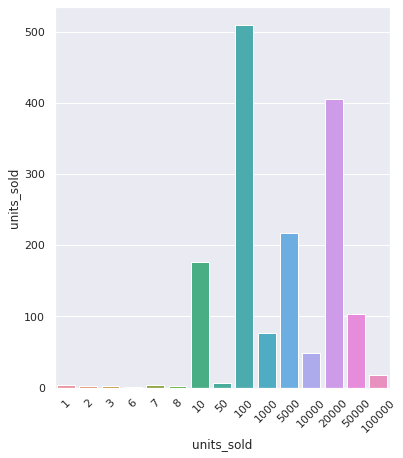

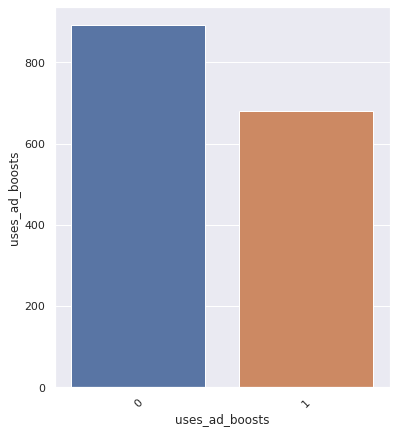

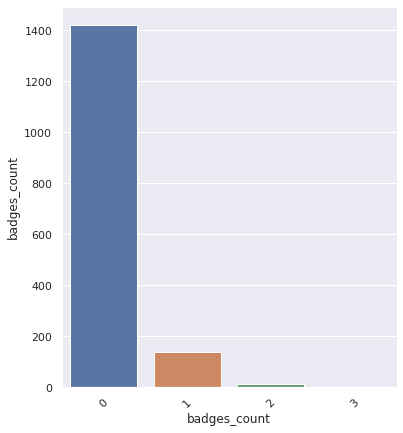

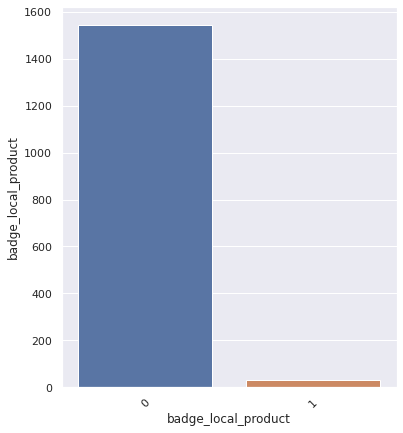

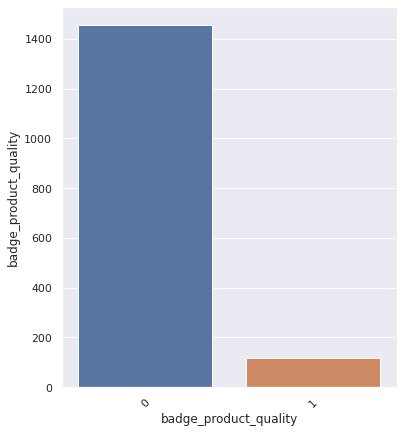

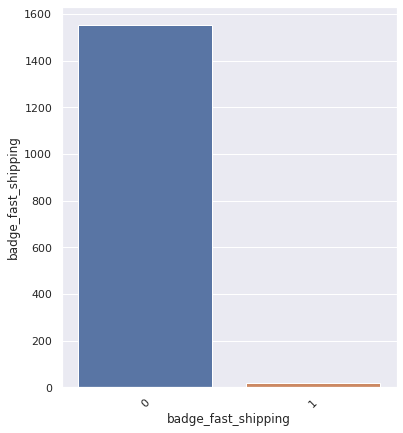

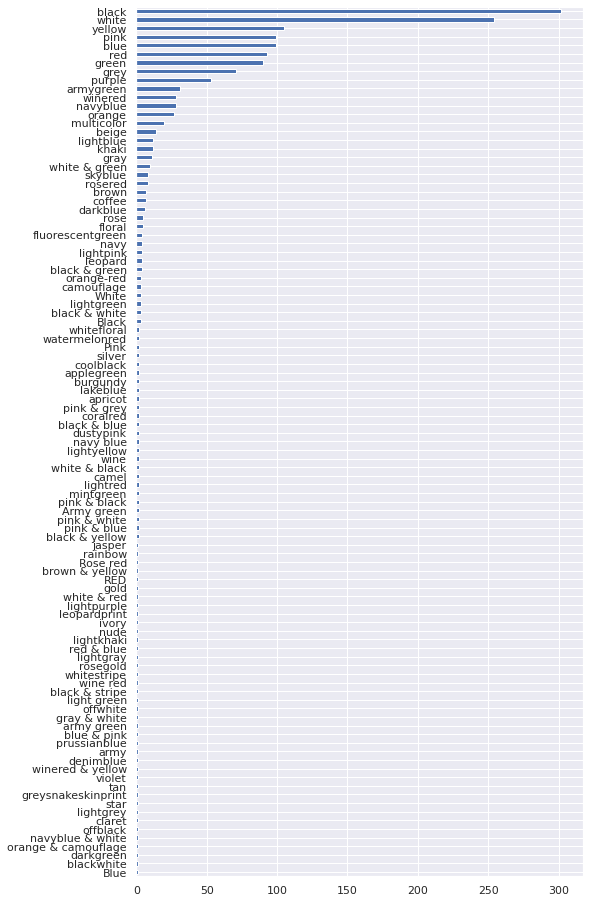

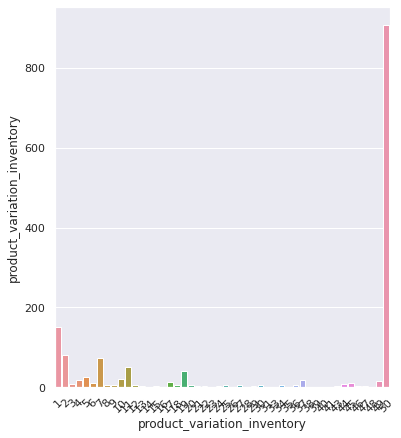

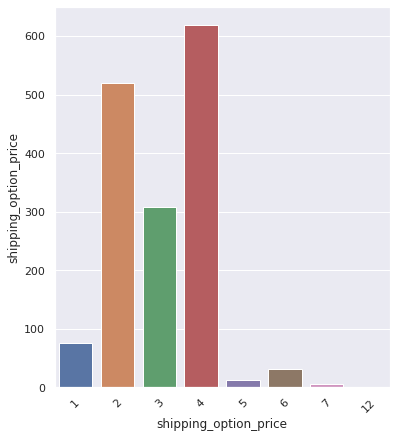

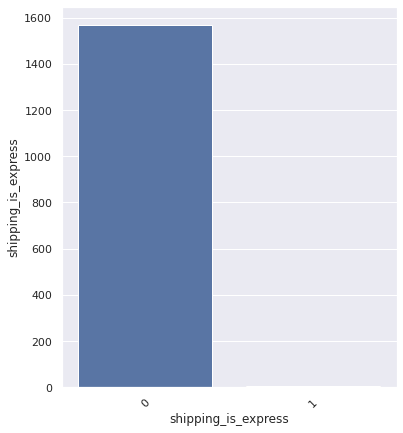

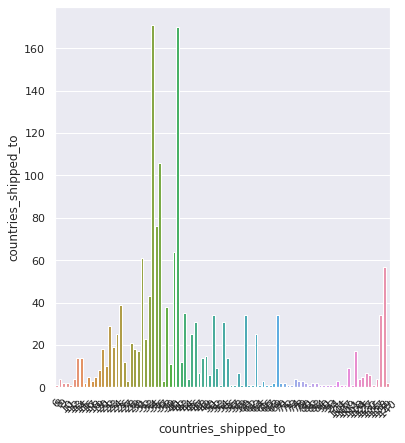

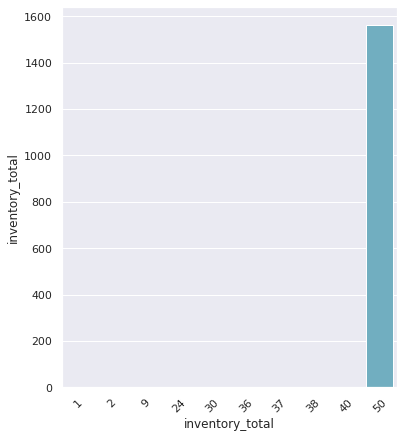

In [ ]:
for col in discrete_plotting.keys():
    if (discrete_plotting[col]=="n")|(discrete_plotting[col]=='i')|(discrete_plotting[col]=='t'):
         if(col=="product_color"):
             plt.figure(figsize=(8,16))
             df['product_color'].value_counts().plot.barh(zorder=2).invert_yaxis()
             plt.show();

         else:
             plt.figure(figsize=(6,7))
             sns.barplot(df[col].unique(), df[col].value_counts())
             plt.xlabel(col)
             plt.xticks(rotation=45);
             plt.show();


#**Q2) b) ii) Mode Value of Discrete Variables**

In [ ]:
for col in variable_dict.keys():
    if(variable_dict[col]=="n")|(variable_dict[col]=="i"):
        print(str(col)+" Mode  is: "+str(df[col].mode(dropna= True)) +"\n")


units_sold Mode  is: 0    100
dtype: int64

uses_ad_boosts Mode  is: 0    0
dtype: int64

badges_count Mode  is: 0    0
dtype: int64

badge_local_product Mode  is: 0    0
dtype: int64

badge_product_quality Mode  is: 0    0
dtype: int64

badge_fast_shipping Mode  is: 0    0
dtype: int64

product_color Mode  is: 0    black
dtype: object

product_variation_inventory Mode  is: 0    50
dtype: int64

shipping_option_price Mode  is: 0    2
dtype: int64

shipping_is_express Mode  is: 0    0
dtype: int64

countries_shipped_to Mode  is: 0    41
dtype: int64

inventory_total Mode  is: 0    50
dtype: int64



#**Q2) b) iii) Entropy of the df**
\begin{equation}
Entropy = -\sum_{i=1}^np(x_i)*ln[\hspace{0.1cm}p(x_i)] 
\end{equation}

\begin{equation}
p(x_i)= f_i/N
\end{equation}

$
x_i= Value \hspace{1mm} of\hspace{0.1cm} i^{th}\hspace{0.1cm} point \hspace{0.1cm} of \hspace{0.1cm} the \hspace{0.1cm} parameter \$

$
f_i= Frequency \hspace{1mm} of\hspace{0.1cm} i^{th} \hspace{0.1cm} data\hspace{0.1cm} point \$

$N= Total \hspace{0.1cm} Number \hspace{0.1cm} of \hspace{0.1cm} Observations
\$

In [ ]:
print("ENTROPIES ARE:")
for col in variable_dict.keys():
    if variable_dict[col]=="n" or variable_dict[col]=='i' or variable_dict[col]=='o' :
        frequency= df[col].value_counts()
        N= frequency.sum()
        entropy= -np.sum( (frequency/N)*np.log(frequency/N) )
        print(str(col)+" : %f"%np.abs(entropy))

ENTROPIES ARE:
units_sold : 1.793904
uses_ad_boosts : 0.684123
badges_count : 0.347906
badge_local_product : 0.091889
badge_product_quality : 0.264824
badge_fast_shipping : 0.068133
product_color : 3.008882
product_variation_size_id : 1.837405
product_variation_inventory : 1.923650
shipping_option_price : 1.338004
shipping_is_express : 0.017732
countries_shipped_to : 3.657806
inventory_total : 0.052250


#**Q2) c) i) Mean, Variance, Skew, Min, Max, Median, Q1, Q3, IQR of each Continuous Variables**

In [ ]:
for col in variable_dict.keys():
    if variable_dict[col]=="c":
        print("Variable: %s" %col)
        print(" 1. Mean= %f" %df[col].mean())
        print(" 2. Variance= %f" %df[col].dropna().var())
        print(" 3. Skew= %f" %df[col].skew())
        print(" 4. Min= %f" %df[col].min())
        print(" 5. Max= %f" %df[col].max())
        print(" 6. Median= %f" %df[col].median())
        print(" 7. Q1 (25th Percentile)= %f" %df[col].quantile(0.25))
        print(" 8. Q3 (75th percentile)= %f" %df[col].quantile(0.75))
        print(" 9. Inter Quartile Range= %f" %(df[col].quantile(0.75)-df[col].quantile(0.25))+"\n")

Variable: price
 1. Mean= 8.325372
 2. Variance= 15.460858
 3. Skew= 1.315891
 4. Min= 1.000000
 5. Max= 49.000000
 6. Median= 8.000000
 7. Q1 (25th Percentile)= 5.810000
 8. Q3 (75th percentile)= 11.000000
 9. Inter Quartile Range= 5.190000

Variable: retail_price
 1. Mean= 23.288620
 2. Variance= 921.599851
 3. Skew= 2.742709
 4. Min= 1.000000
 5. Max= 252.000000
 6. Median= 10.000000
 7. Q1 (25th Percentile)= 7.000000
 8. Q3 (75th percentile)= 26.000000
 9. Inter Quartile Range= 19.000000

Variable: rating
 1. Mean= 3.820896
 2. Variance= 0.265610
 3. Skew= -0.530912
 4. Min= 1.000000
 5. Max= 5.000000
 6. Median= 3.850000
 7. Q1 (25th Percentile)= 3.550000
 8. Q3 (75th percentile)= 4.110000
 9. Inter Quartile Range= 0.560000

Variable: rating_count
 1. Mean= 889.659250
 2. Variance= 3935973.619184
 3. Skew= 4.789467
 4. Min= 0.000000
 5. Max= 20744.000000
 6. Median= 150.000000
 7. Q1 (25th Percentile)= 24.000000
 8. Q3 (75th percentile)= 855.000000
 9. Inter Quartile Range= 831.00

#**Q2) c) ii) Box And Whisker Plots for Continuous Variables**
Have used a **Logarithmic Scale** for the Box and Whiskers Plot

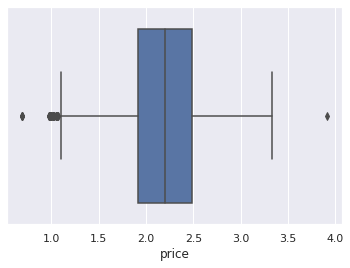

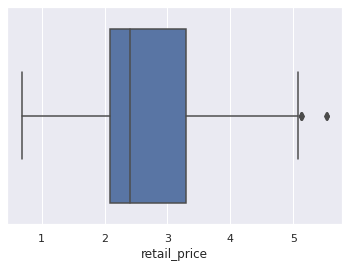

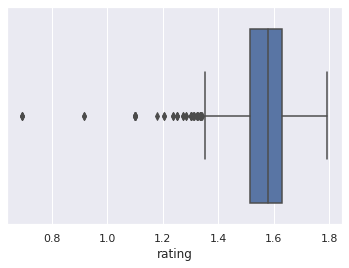

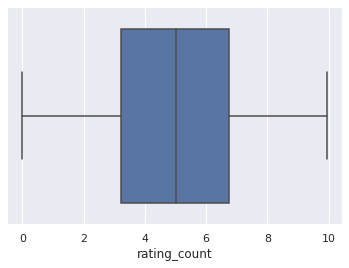

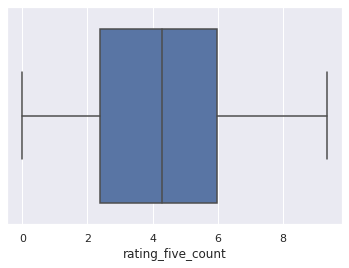

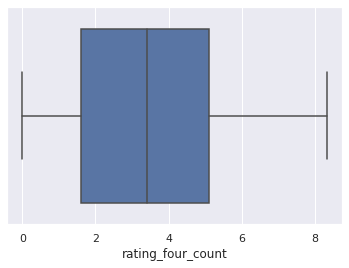

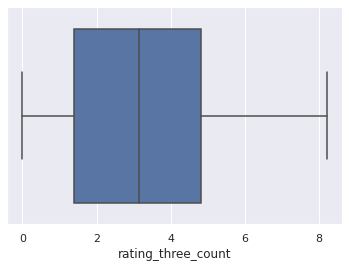

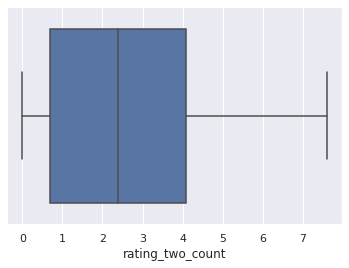

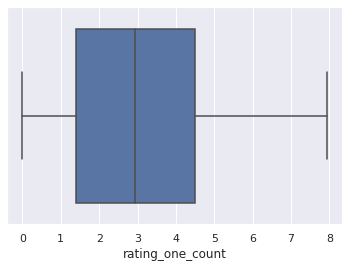

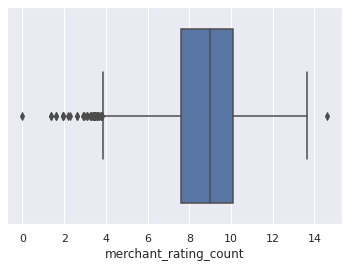

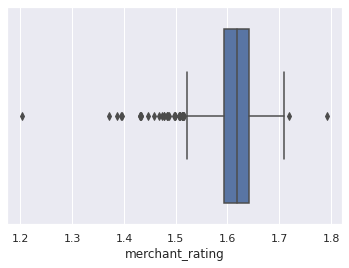

In [ ]:
for col in variable_dict.keys():
    if variable_dict[col]=='c':
        sns.boxplot(np.log(1+df[col]));
        plt.xlabel(col);
        plt.show();

#**Q2) c) iii) Plotting Histograms**
Once with **very few** bins, once with **very high** number of bins, another time with a **good** number of bins

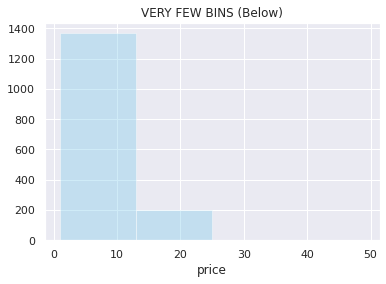

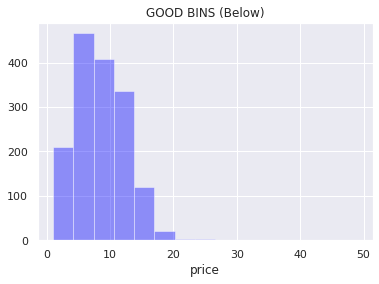

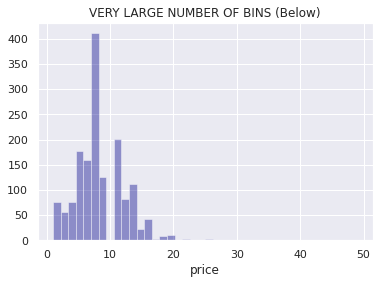

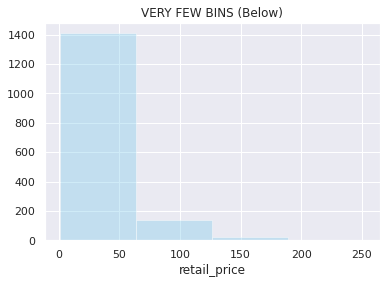

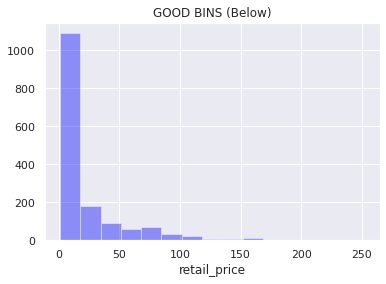

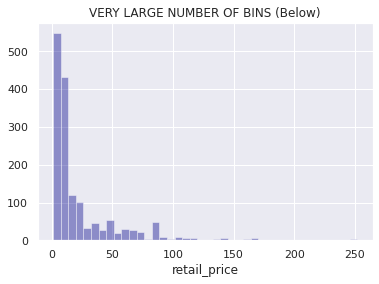

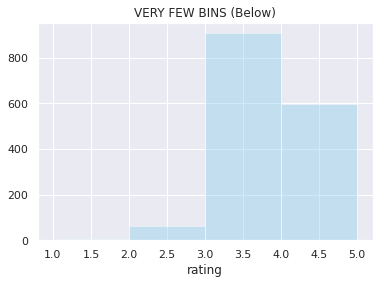

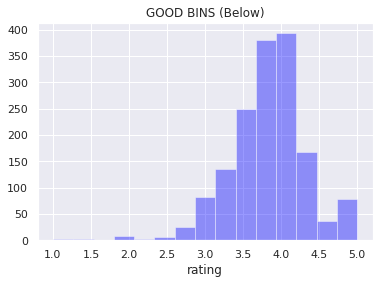

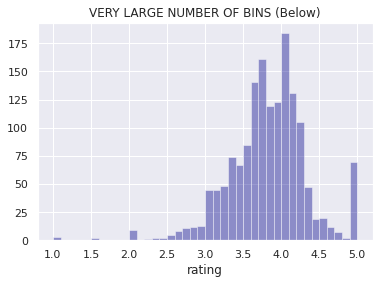

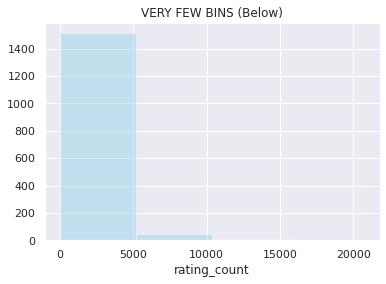

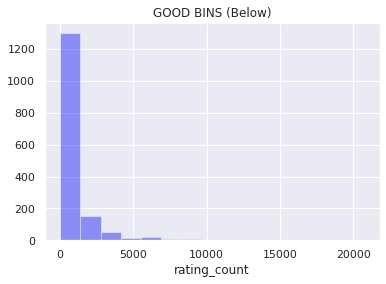

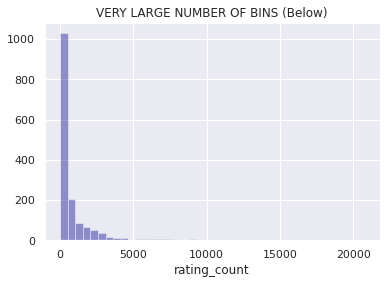

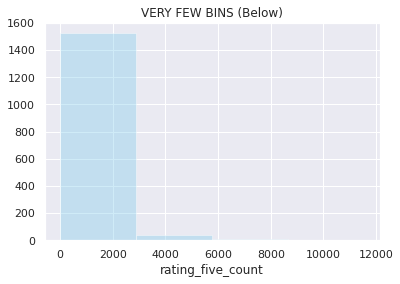

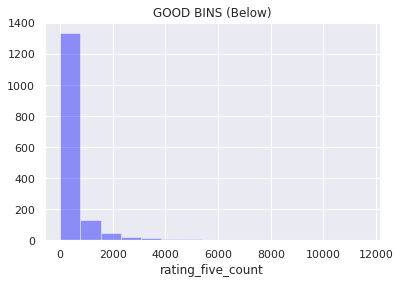

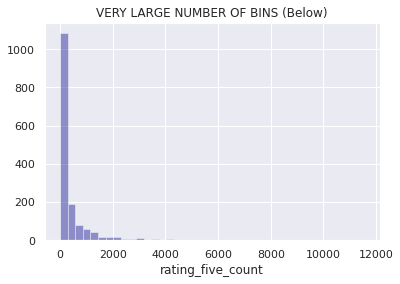

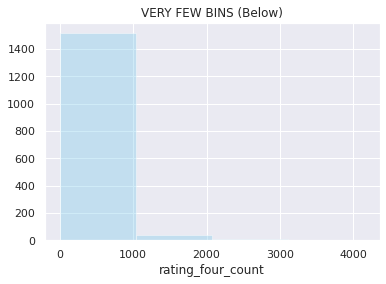

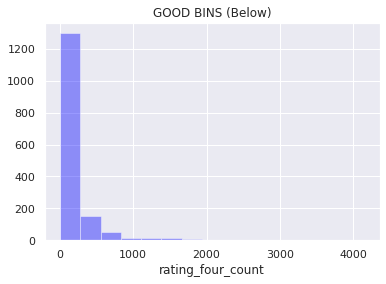

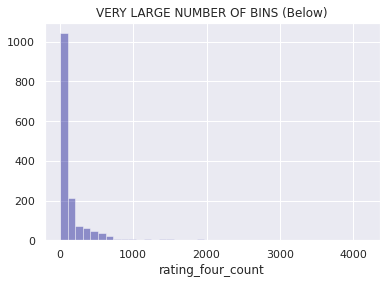

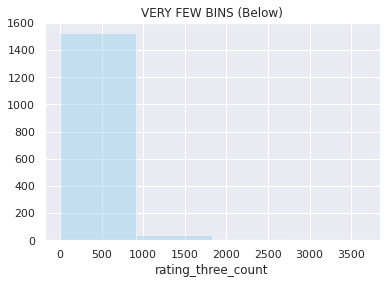

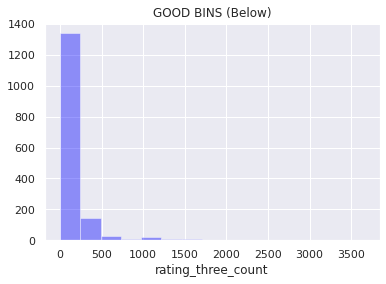

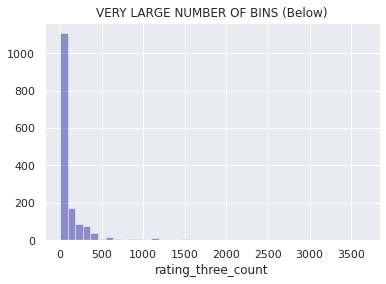

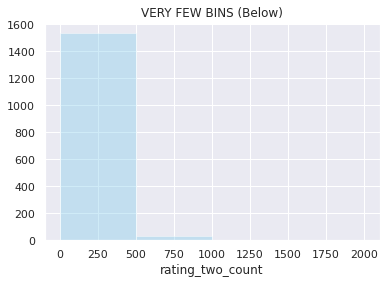

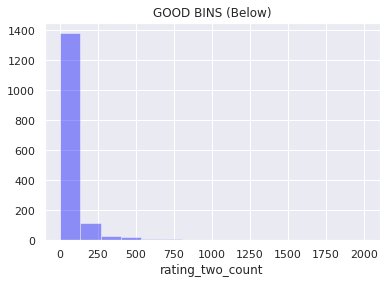

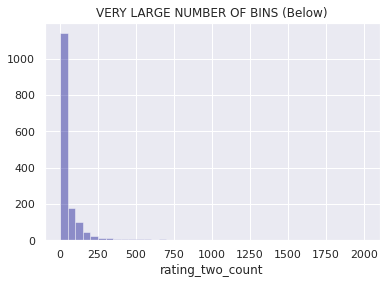

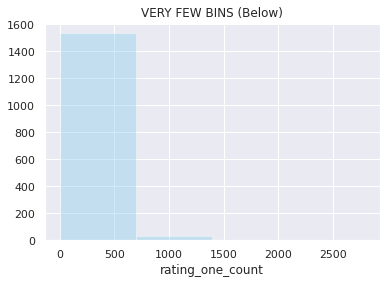

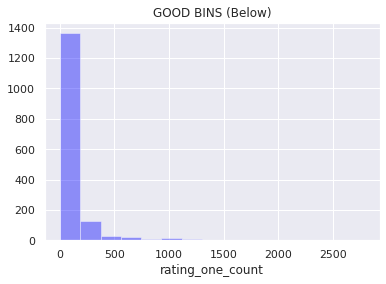

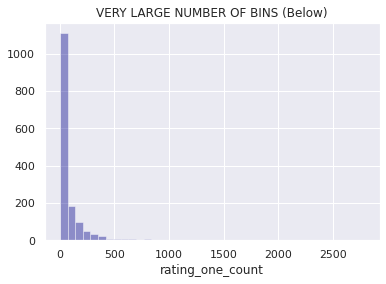

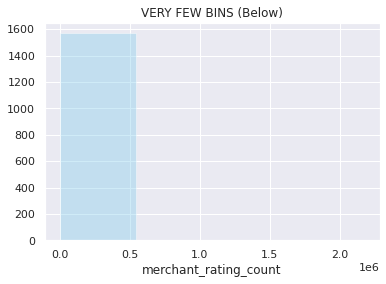

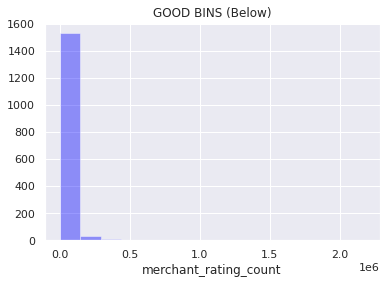

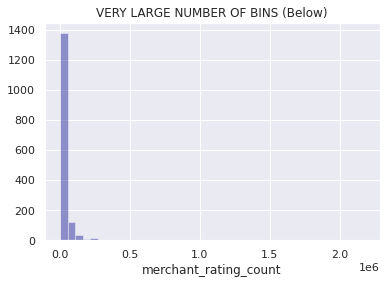

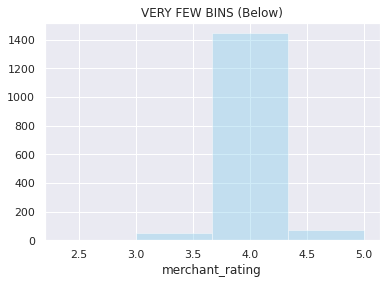

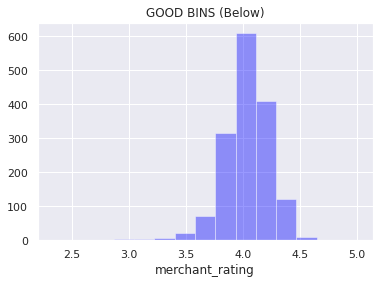

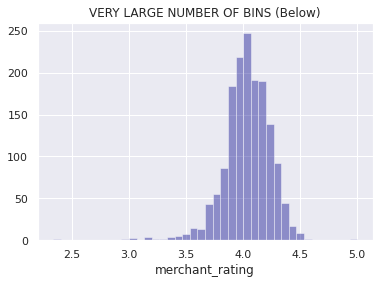

In [ ]:
for col in variable_dict.keys():
    if variable_dict[col]=="c":
       
       #Plotting Histogram with VERY FEW bins 
       sns.distplot(df[col], bins=4, kde=False, color='skyblue')
       plt.xlabel(col);
       plt.title("VERY FEW BINS (Below)")
       plt.show();

       #Plotting Histogram with GOOD Number of Bins
       sns.distplot(df[col], bins=15, kde=False, color='blue')
       plt.xlabel(col);
       plt.title("GOOD BINS (Below)")
       plt.show();

       #Plotting Histogram with VERY LARGE number of Bins
       sns.distplot(df[col], bins=40, kde=False, color='darkblue')
       plt.xlabel(col);
       plt.title("VERY LARGE NUMBER OF BINS (Below)")
       plt.show();

#**Q2) c) iv) QQ PLOT**

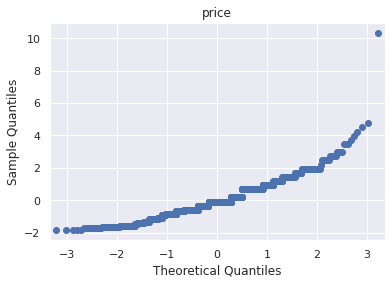

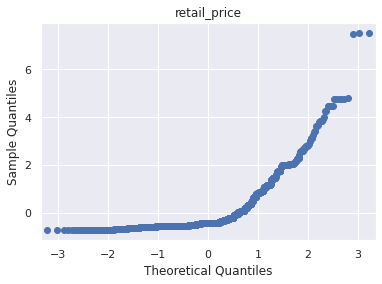

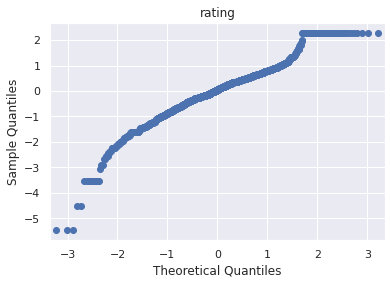

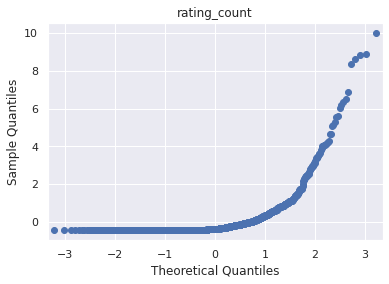

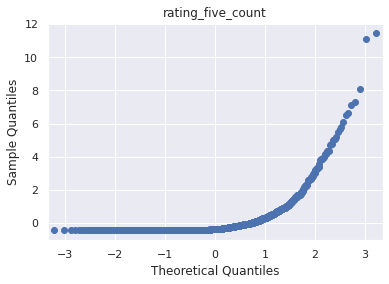

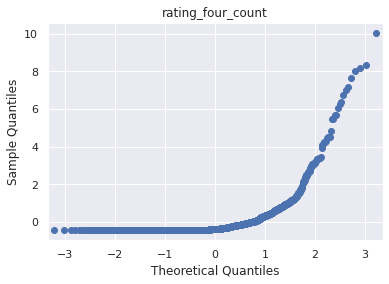

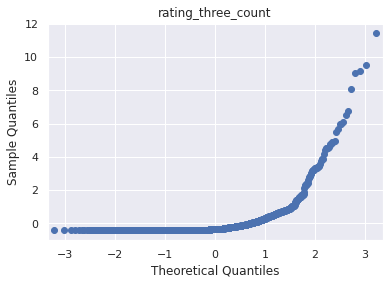

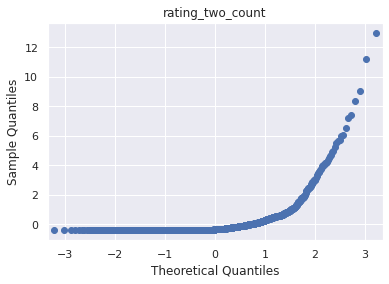

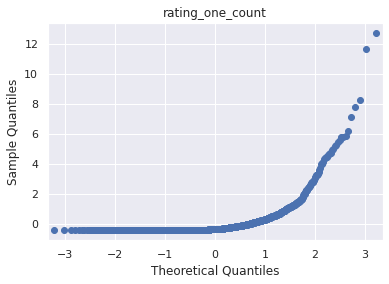

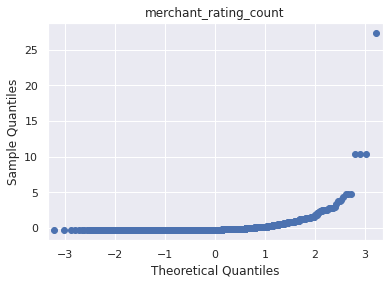

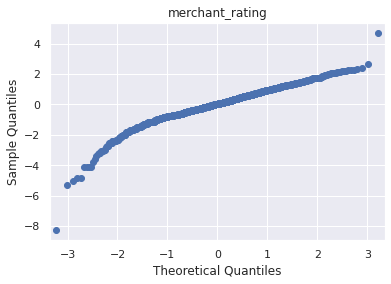

In [ ]:
import statsmodels.api as sm
for col in variable_dict.keys():
  if variable_dict[col]=='c':
    sm.qqplot(df[col].dropna(), fit=True)
    plt.title(col)
    plt.show();


#**Q2) c) v) Checking whether variables are Log Normal or not**

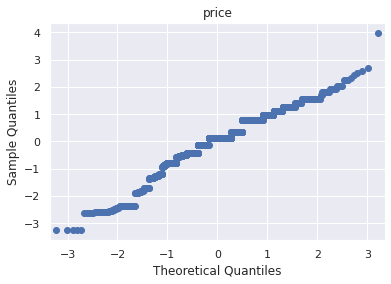

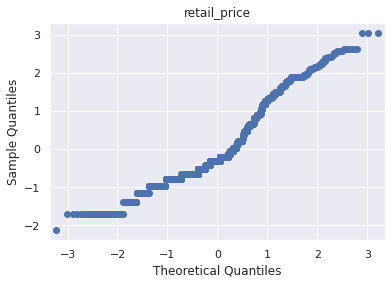

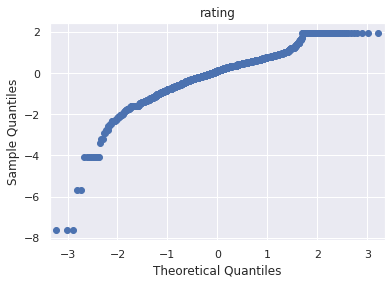

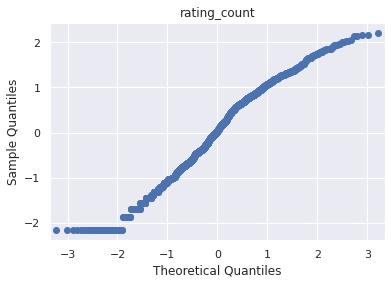

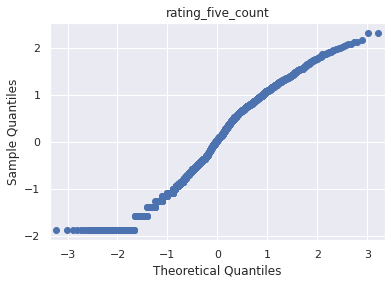

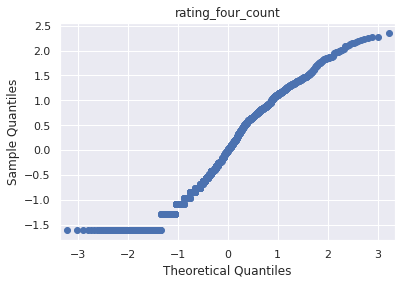

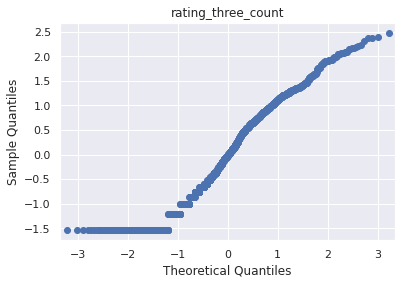

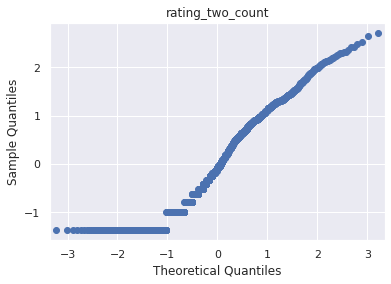

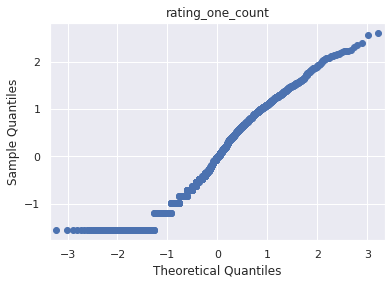

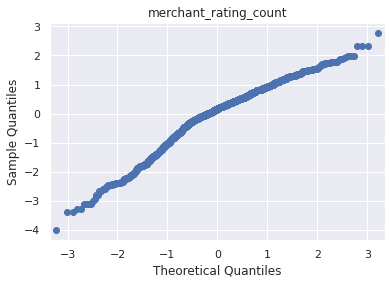

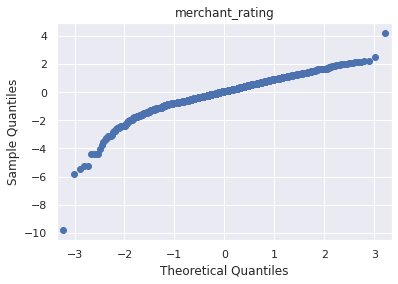

In [ ]:
for col in variable_dict.keys():
    if variable_dict[col]=='c':
        sm.qqplot(np.log(1+df[col]), fit=True)
        plt.title(col);
        plt.show();

#**Q2) d) i) Discrete-Continuous Pairs' Analysis**

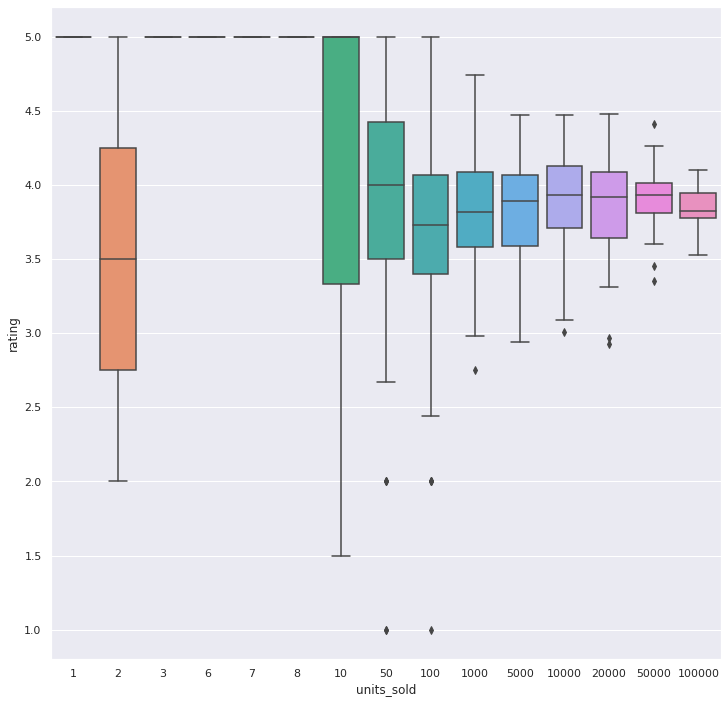

In [ ]:
fig, ax= plt.subplots(figsize=(12,12), nrows=1, ncols=1)
sns.boxplot(df['units_sold'], df['rating']);
plt.show();

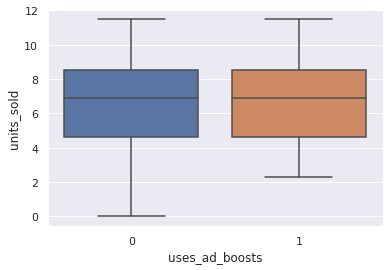

In [ ]:
#Yes I know I've considered units_sold a integer df, but logically made more sense
#to compare units sold to the use of ad boosts or not
sns.boxplot(df['uses_ad_boosts'], np.log(df['units_sold']))
plt.show();

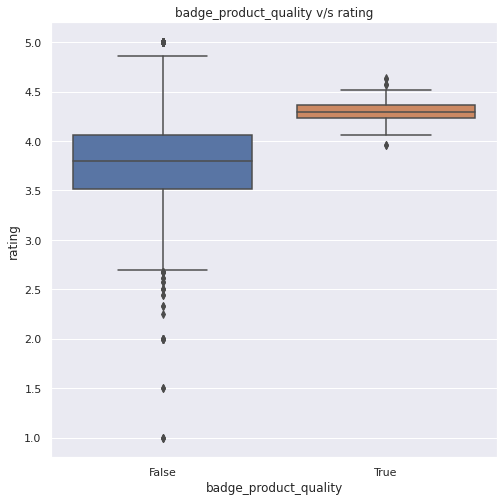

In [ ]:
fig, ax=plt.subplots(figsize=(8,8), nrows=1, ncols=1)
plt.title("badge_product_quality v/s rating")
sns.boxplot(df['badge_product_quality'].astype(bool), df['rating']);
plt.show();

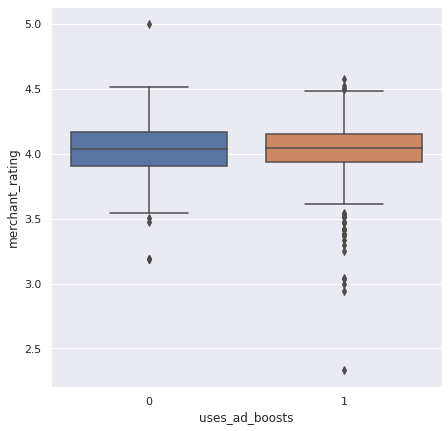

In [ ]:
plt.subplots(figsize=(7,7), nrows=1, ncols=1)
sns.boxplot(df["uses_ad_boosts"], df["merchant_rating"]);
plt.show()

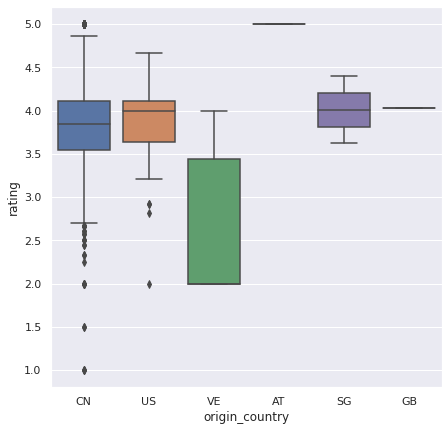

In [ ]:
plt.subplots(figsize=(7,7), nrows=1, ncols=1)
sns.boxplot(df["origin_country"], df["rating"]);
plt.show()

#**Q2) d) ii) Plotting Heat Map for Continuous Variables**

In [ ]:
#Getting a List of Continuous Column Names
continuous=[]
for col in variable_dict.keys():
    if variable_dict[col]=='c':
        continuous.append(col) 

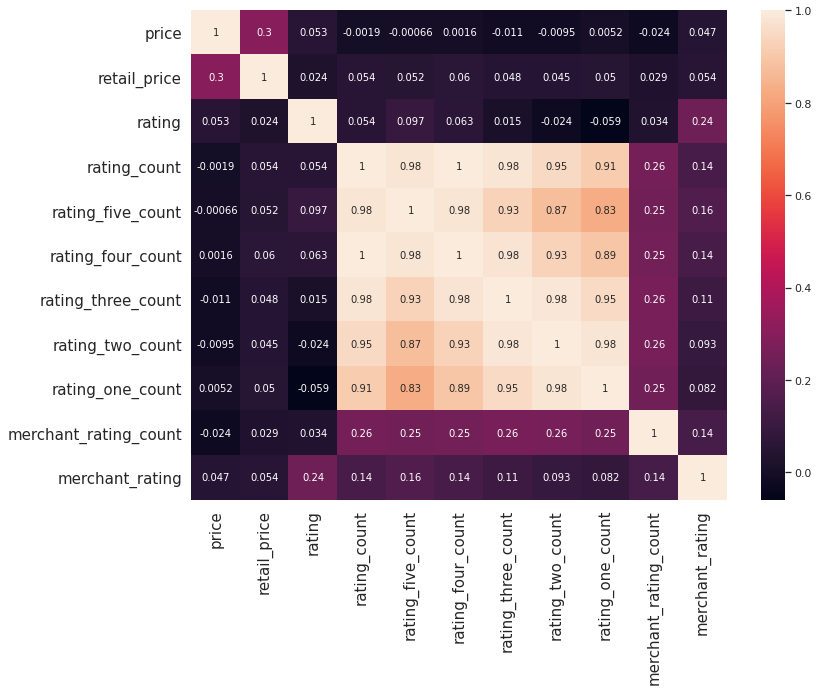

In [ ]:
plt.subplots(figsize=(12,9),nrows=1, ncols=1)
sns.heatmap(df[continuous].corr(), annot=True);
plt.xticks(size=15)
plt.yticks(size=15)
plt.show();

#**Q2) e) Other EDA Methods**

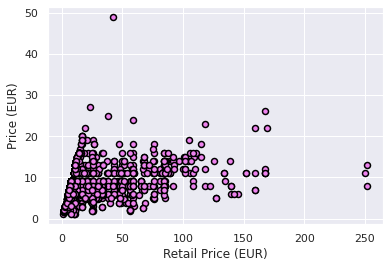

In [ ]:
plt.plot(df["retail_price"], df["price"], 'o', mec='black', mew='1.5', ms='6', color='violet')
plt.xlabel("Retail Price (EUR)")
plt.ylabel("Price (EUR)")
plt.show();

In [ ]:
pd.crosstab(df["origin_country"], df["units_sold"])

units_sold,1,2,3,6,7,8,10,50,100,1000,5000,10000,20000,50000,100000
origin_country,,,,,,,,,,,,,,,
AT,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
CN,3,2,2,1,2,4,48,70,482,394,211,175,100,16,6
GB,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
SG,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
US,0,0,0,0,0,0,1,3,14,7,5,1,0,0,0
VE,0,0,0,0,0,0,0,3,2,0,0,0,0,0,0


In [ ]:
pd.crosstab(df["origin_country"], df["badge_product_quality"].astype(bool))

badge_product_quality,False,True
origin_country,,
AT,1,0
CN,1403,113
GB,1,0
SG,2,0
US,27,4
VE,5,0


In [ ]:
pd.crosstab(df["badge_product_quality"], df["has_urgency_banner"].astype(bool))

has_urgency_banner,False,True
badge_product_quality,,
0,1016,440
1,84,33
